In [18]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../../")
# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import  soporte_ajuste_logistica as sal

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_pickle("../../datos/06_datos_balanceados.pkl")

In [20]:
df.shape

(1491, 95)

# Regresion Logística

In [21]:
params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.005, 0.01,0.05, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10,20,40,100,150]
}

In [22]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression",param_grid = params_logistic,ruta_guardar_modelo="../../datos/encoders_y_modelos",nombre_modelo_guardar="logistic_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.005, 0.01, 0.05, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [10, 20, 40, 100, 150]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=1, max_iter=40, penalty='l1', random_state=42,
                   solver='saga')
-------------------------------------------------


### Matriz Logistica

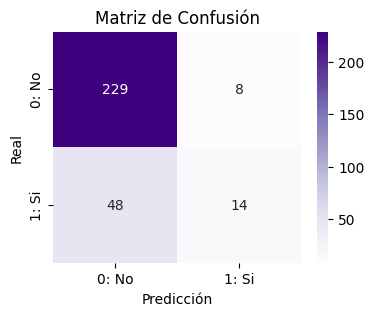

In [23]:
logistica.plot_matriz_confusion("logistic_regression",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [24]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573


### Curva ROC

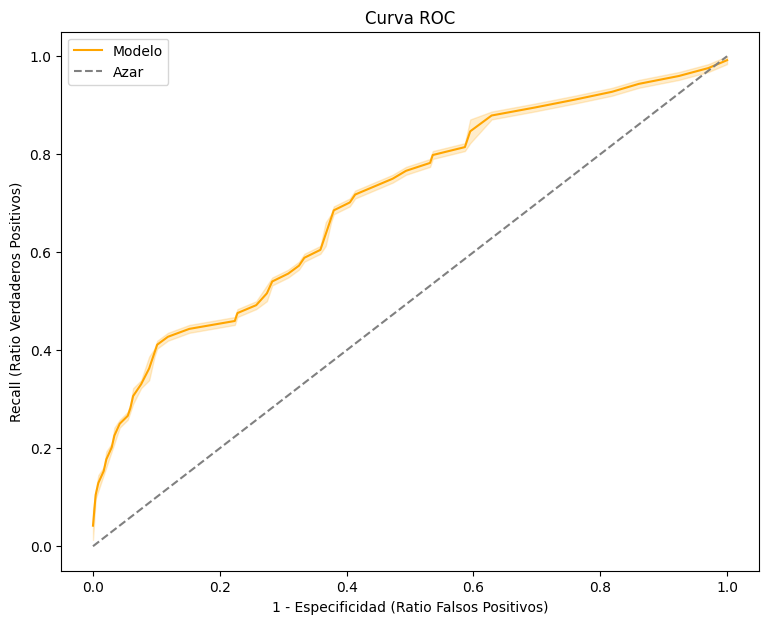

In [25]:
logistica.plot_curva_ROC()

### Importancia

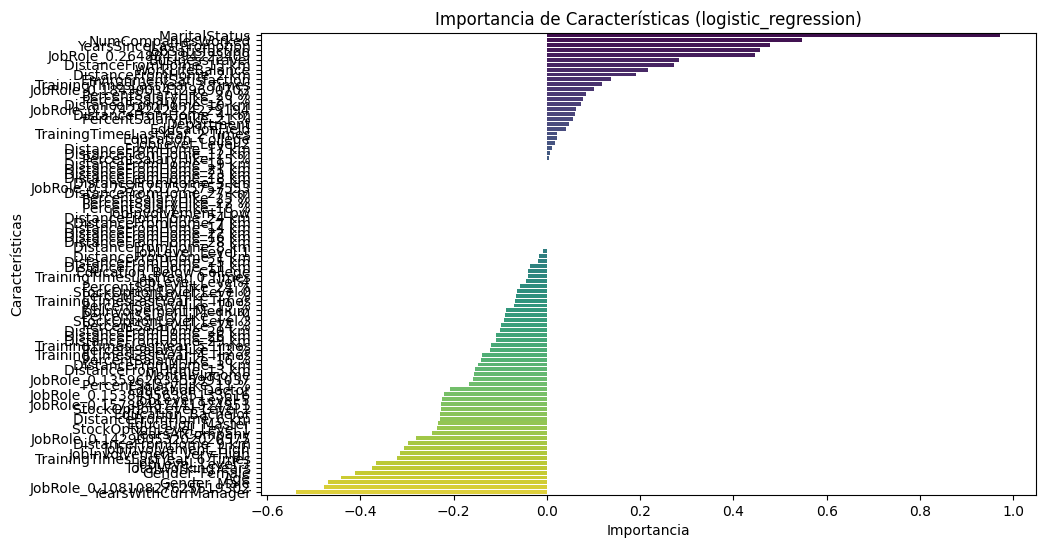

In [26]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

### Shap Plots

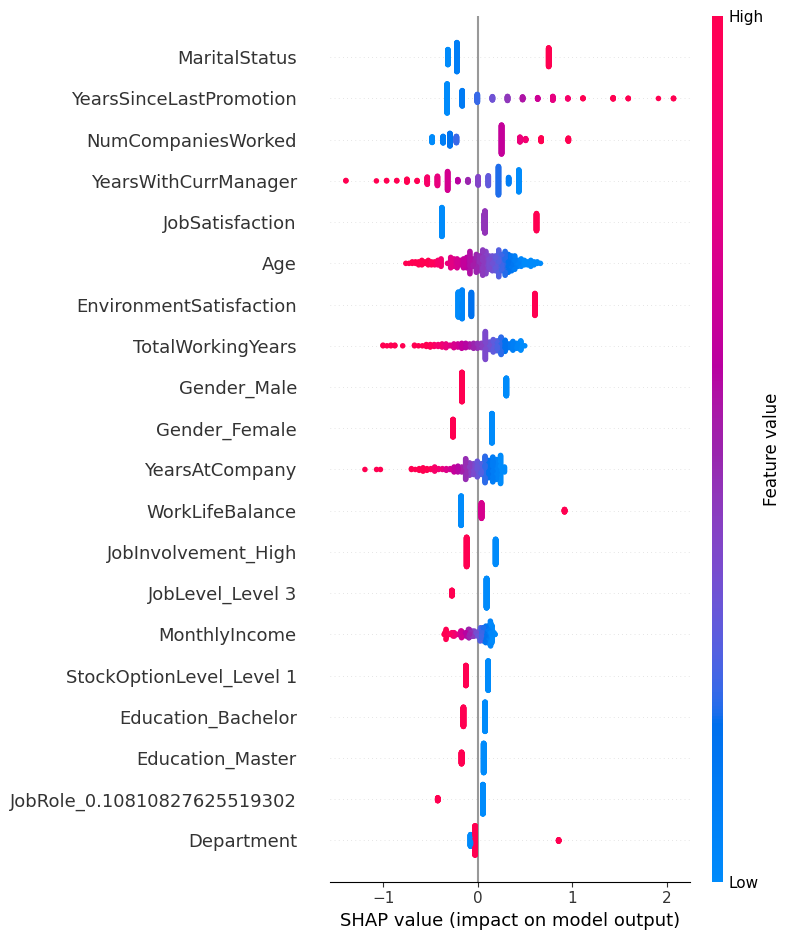

In [27]:
logistica.plot_shap_summary(modelo_nombre ='logistic_regression')

# Decision Tree

In [28]:
# instanciamos la clase de regresión logistica
decision_tree = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
decision_tree.ajustar_modelo("tree",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="decision_tree_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=3, random_state=42)
-------------------------------------------------


### Matriz Logistica

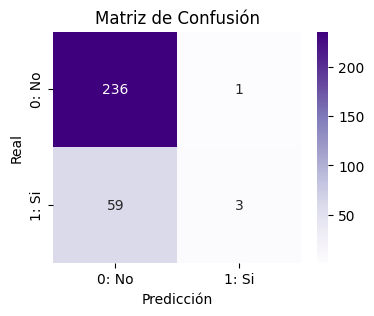

In [29]:
decision_tree.plot_matriz_confusion("tree",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [30]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = decision_tree.calcular_metricas(modelo_nombre =  "tree")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154
test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607


### Curva ROC

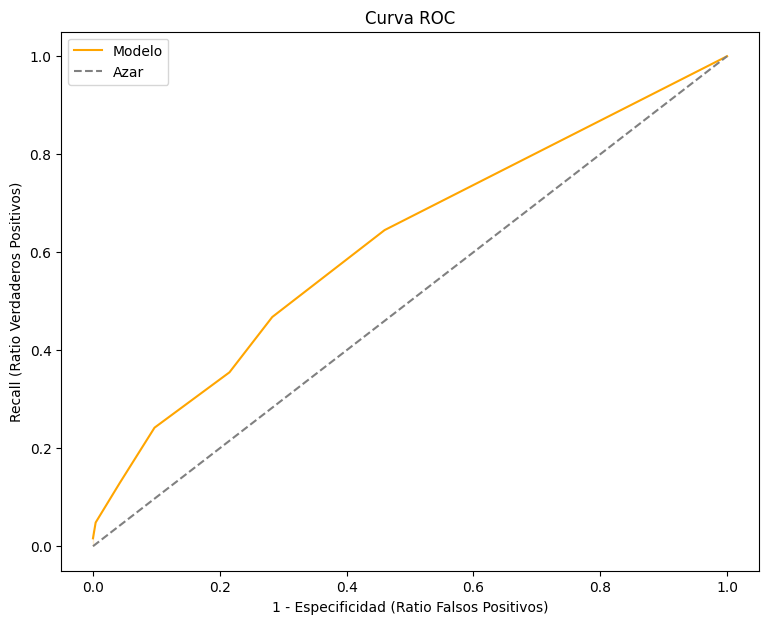

In [31]:
decision_tree.plot_curva_ROC()

### Importancia

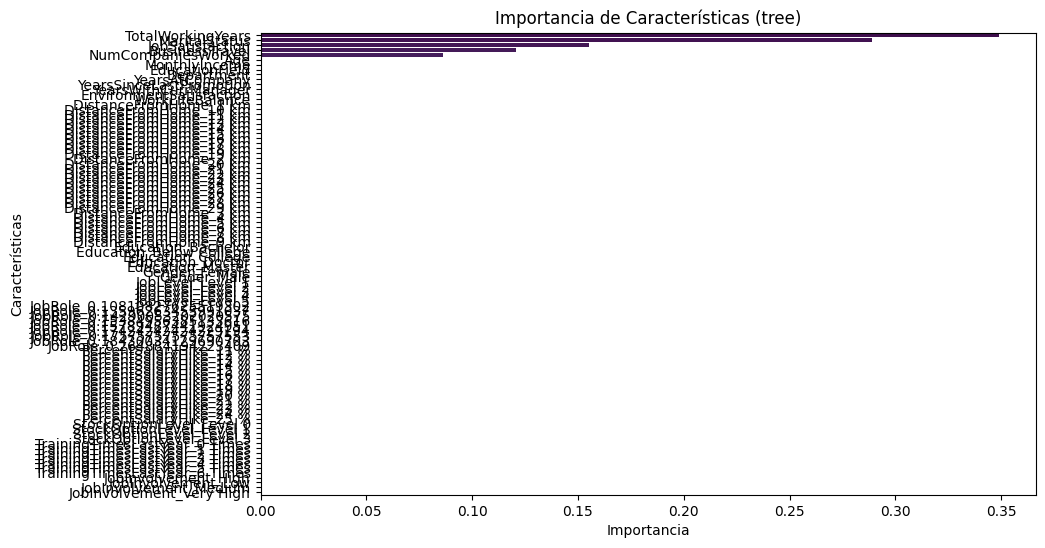

In [32]:
# Mostramos la importancia de los predictores en el modelo regresión logística
decision_tree.importancia_predictores(modelo_nombre ='tree')

### Shap Plots

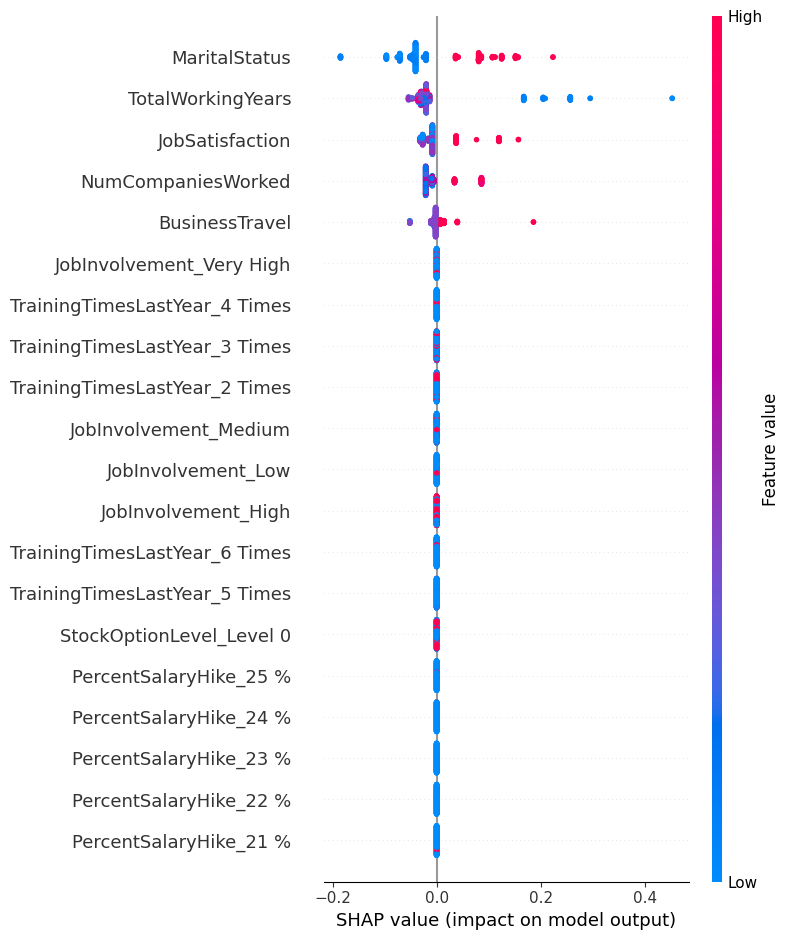

In [33]:
decision_tree.plot_shap_summary(modelo_nombre ='tree')

# Random Forest

In [34]:
# instanciamos la clase de regresión logistica
random_forest = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
random_forest.ajustar_modelo("random_forest",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="random_forest.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
-------------------------------------------------


### Matriz Logistica

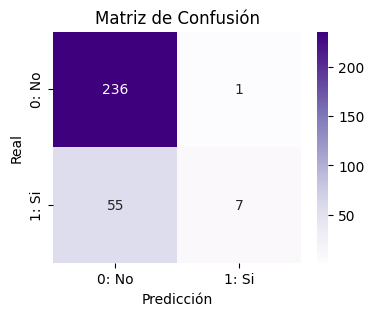

In [35]:
random_forest.plot_matriz_confusion("random_forest",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [36]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = random_forest.calcular_metricas(modelo_nombre = "random_forest")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,0.999161,0.999162,0.999161,0.999160,0.996863,1.000000
test,0.812709,0.824268,0.812709,0.750046,0.160197,0.731965


### Curva ROC

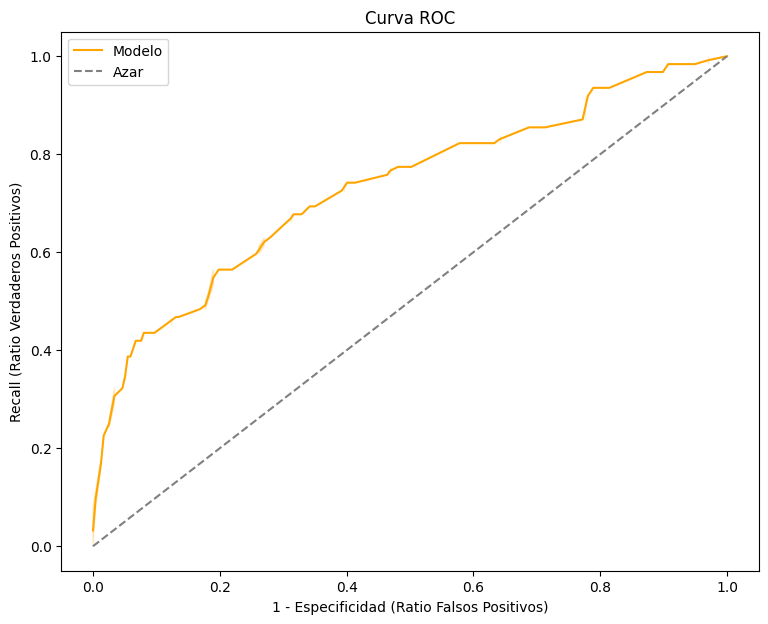

In [37]:
random_forest.plot_curva_ROC()

### Importancia

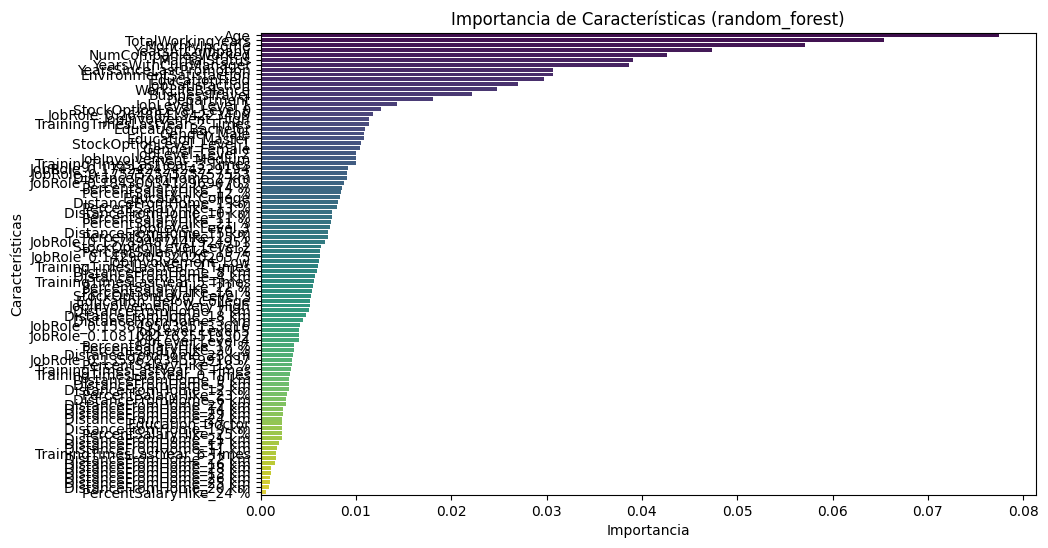

In [38]:
# Mostramos la importancia de los predictores en el modelo regresión logística
random_forest.importancia_predictores(modelo_nombre ='random_forest')

### Shap Plots

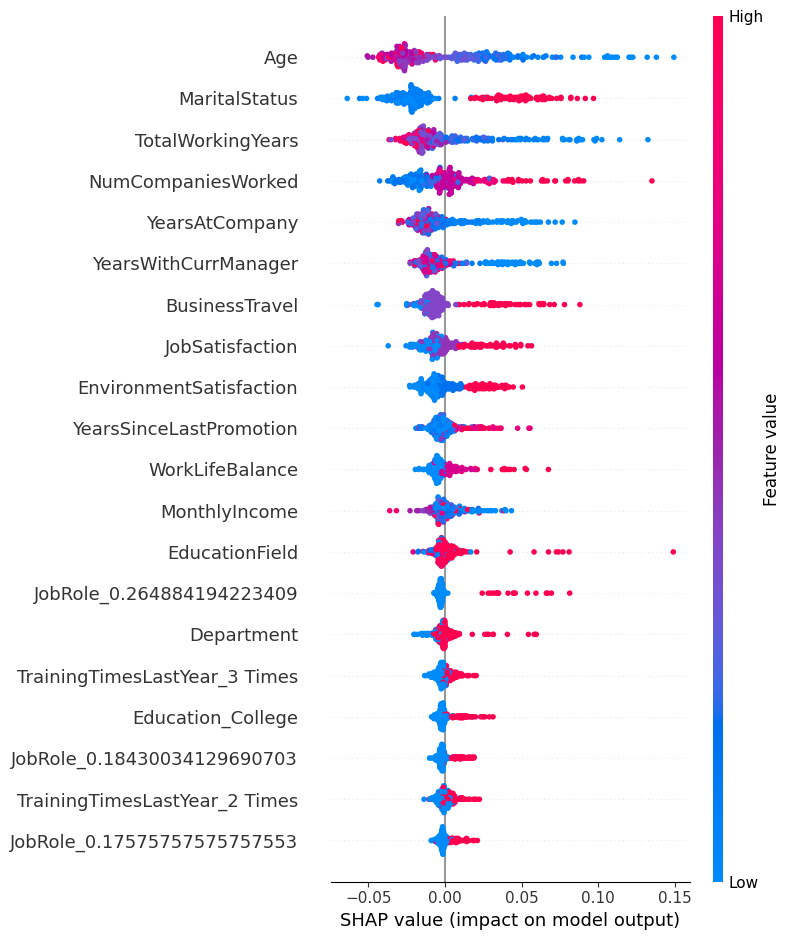

In [39]:
random_forest.plot_shap_summary(modelo_nombre ='random_forest')

# Gradient Boosting

In [40]:
# instanciamos la clase de regresión logistica
gradient_boosting = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
gradient_boosting.ajustar_modelo("gradient_boosting",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="gradient_boosting_model.pkl")

KeyboardInterrupt: 

### Matriz Logistica

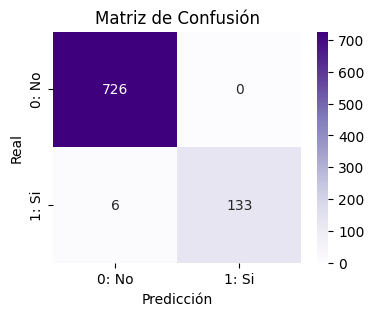

In [ ]:
gradient_boosting.plot_matriz_confusion("gradient_boosting",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = gradient_boosting.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
test,0.993064,0.99312,0.993064,0.993001,0.973828,0.972412


### Curva ROC

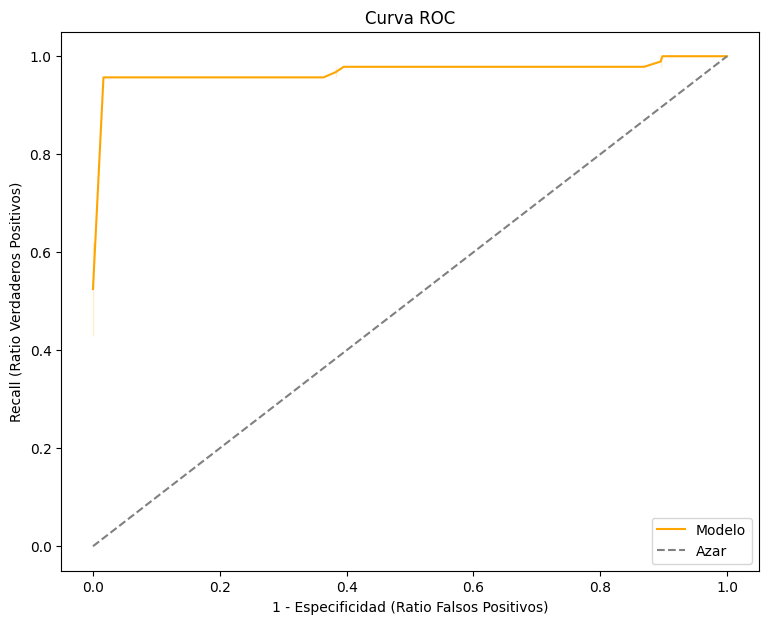

In [ ]:
gradient_boosting.plot_curva_ROC()

### Importancia

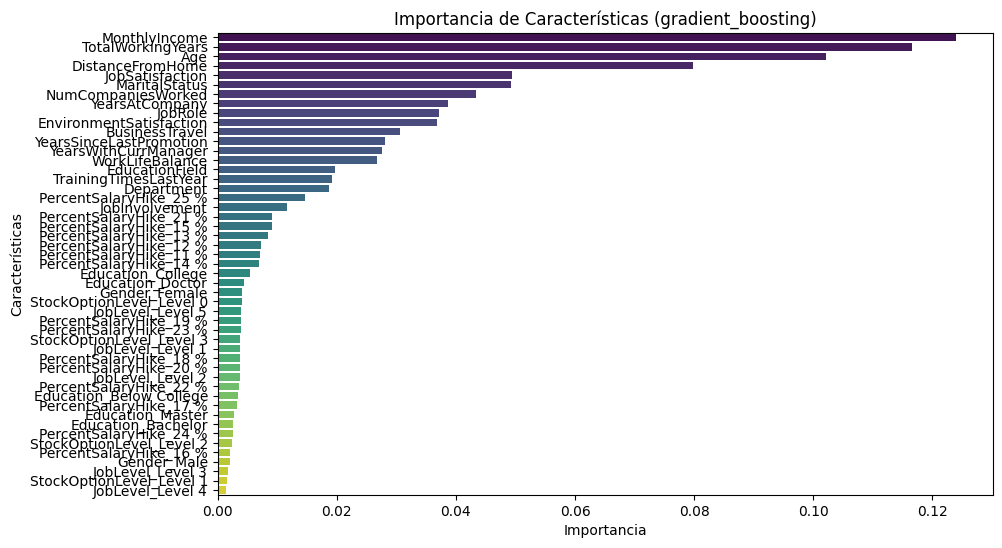

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
gradient_boosting.importancia_predictores(modelo_nombre ='gradient_boosting')

### Shap Plots

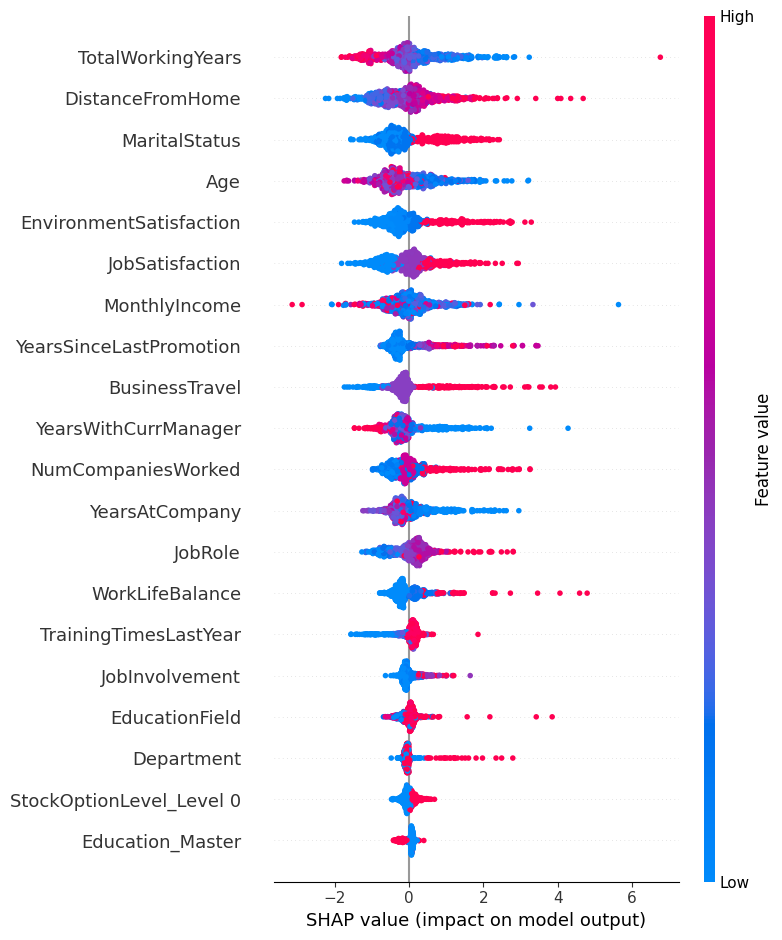

In [ ]:
gradient_boosting.plot_shap_summary(modelo_nombre ='gradient_boosting')

# XGBooster

In [ ]:
# instanciamos la clase de regresión logistica
xgbooster = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster.ajustar_modelo("xgboost",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="XGBooster.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------


### Matriz Logistica

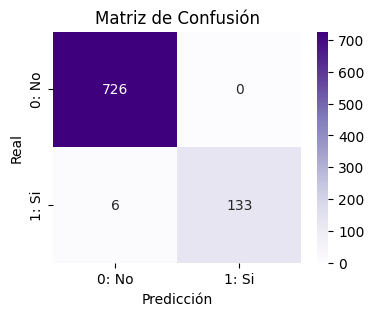

In [ ]:
xgbooster.plot_matriz_confusion("xgboost",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = xgbooster.calcular_metricas(modelo_nombre = "xgboost")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
test,0.993064,0.99312,0.993064,0.993001,0.973828,0.970391


### Curva ROC

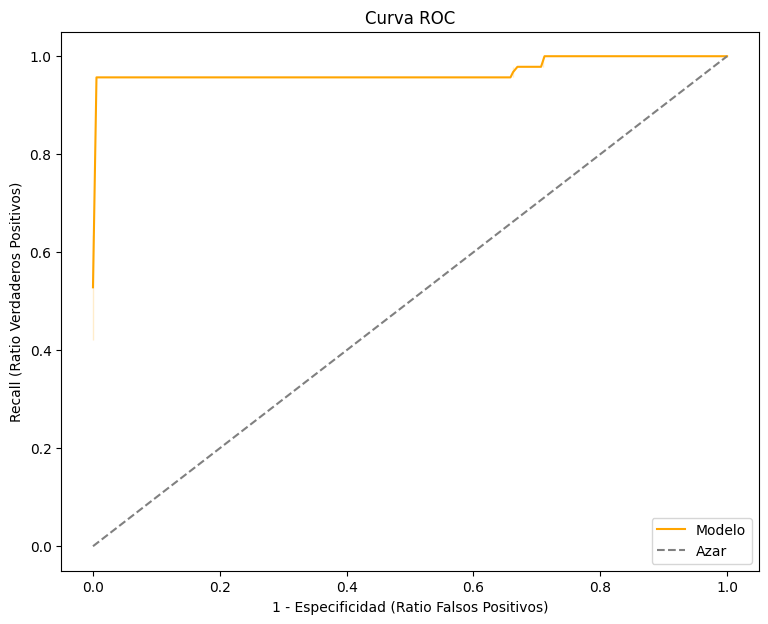

In [ ]:
xgbooster.plot_curva_ROC()

### Importancia

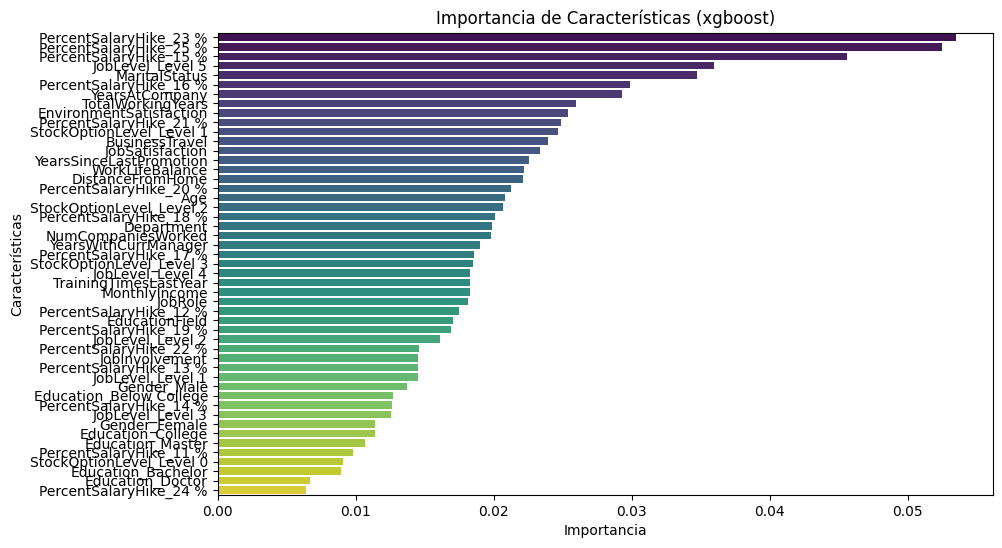

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgbooster.importancia_predictores(modelo_nombre ='xgboost')

### Shap Plots

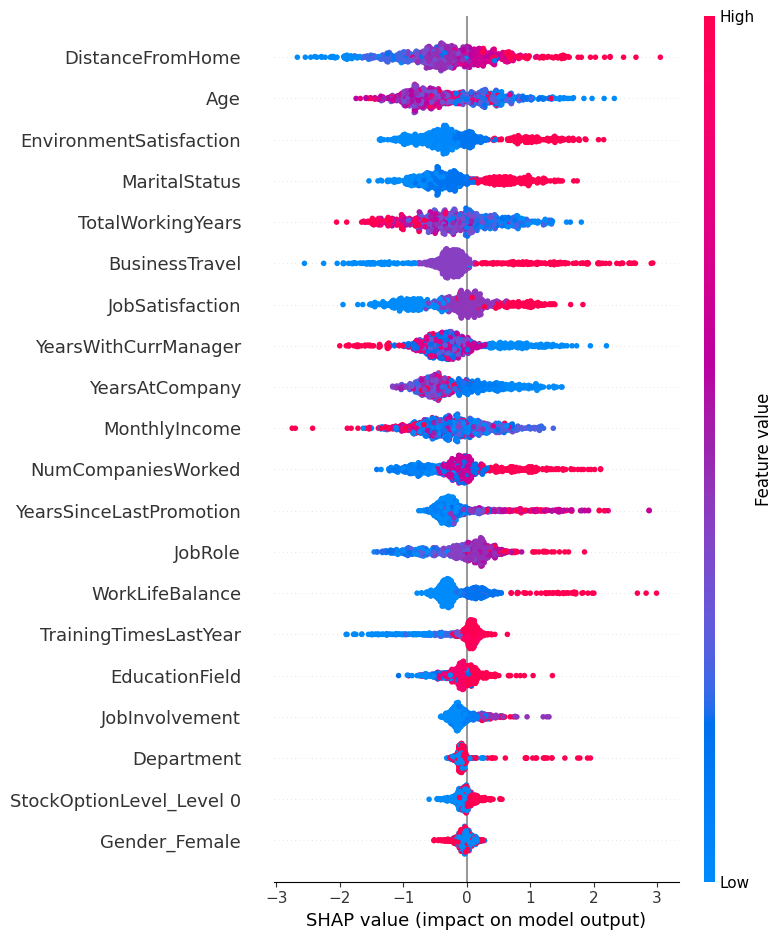

In [ ]:
xgbooster.plot_shap_summary(modelo_nombre ='xgboost')